In [73]:
%pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#world happiness report from 2019
df = pd.read_csv("C:/Users/anish/Downloads/2019.csv")

print("Shape:", df.shape)
df.head()

Note: you may need to restart the kernel to use updated packages.
Shape: (156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [74]:
#column cleanup

df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

df.info()

df.describe(include=[np.number]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  156 non-null    int64  
 1   country_or_region             156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp_per_capita                156 non-null    float64
 4   social_support                156 non-null    float64
 5   healthy_life_expectancy       156 non-null    float64
 6   freedom_to_make_life_choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,count,mean,std,min,25%,50%,75%,max
overall_rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
gdp_per_capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
social_support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
healthy_life_expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
freedom_to_make_life_choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
perceptions_of_corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [75]:
#preprocessing checks (nulls, duplicates, types)

nulls = df.isna().sum().sort_values(ascending=False)
print("Missing values by column:\n", nulls)

null_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
print("\n% Missing by column:\n", null_pct)

dup_rows = df.duplicated().sum()
print("\nDuplicate full rows:", dup_rows)

for cand in ["country_or_region", "country", "country_name"]:
    if cand in df.columns:
        print(f"Duplicate values in `{cand}`:", df[cand].duplicated().sum())
        break

df.dtypes

Missing values by column:
 overall_rank                    0
country_or_region               0
score                           0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

% Missing by column:
 overall_rank                    0.0
country_or_region               0.0
score                           0.0
gdp_per_capita                  0.0
social_support                  0.0
healthy_life_expectancy         0.0
freedom_to_make_life_choices    0.0
generosity                      0.0
perceptions_of_corruption       0.0
dtype: float64

Duplicate full rows: 0
Duplicate values in `country_or_region`: 0


overall_rank                      int64
country_or_region                object
score                           float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

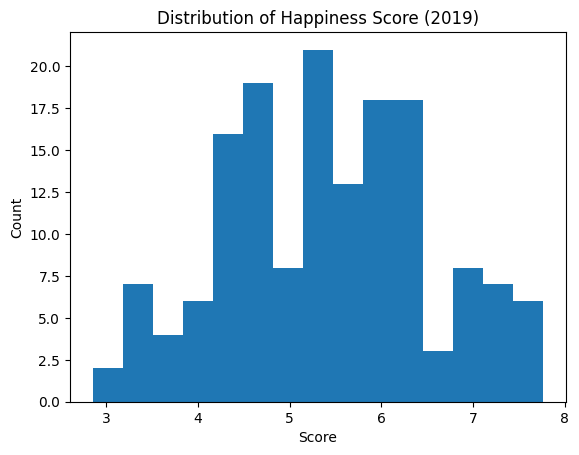

In [76]:
#histogram of happiness score

df_use = df

plt.figure()
plt.hist(df_use["score"], bins=15)
plt.title("Distribution of Happiness Score (2019)")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

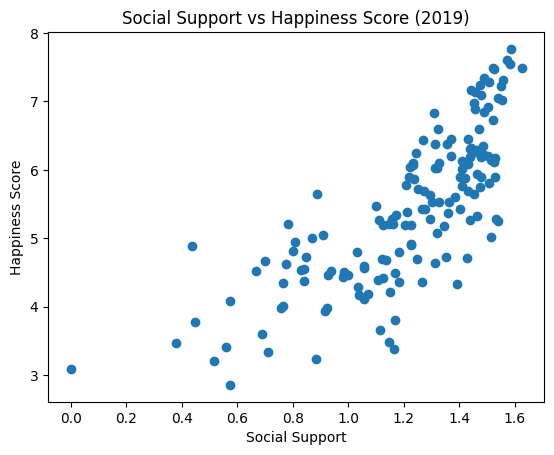

In [77]:
#social support vs score

if "social_support" in df_use.columns:
    plt.figure()
    plt.scatter(df_use["social_support"], df_use["score"])
    plt.title("Social Support vs Happiness Score (2019)")
    plt.xlabel("Social Support")
    plt.ylabel("Happiness Score")
    plt.show()

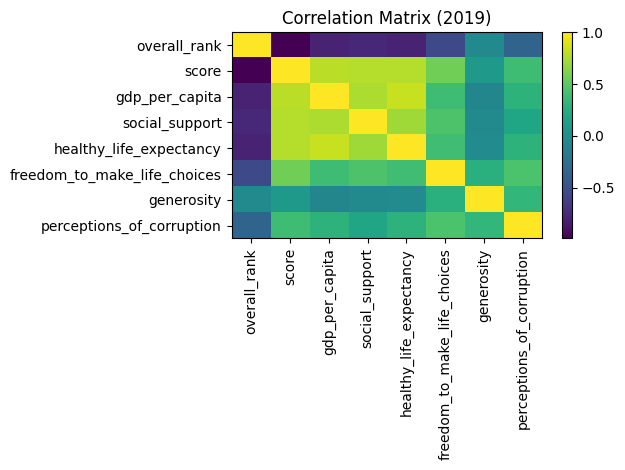

score                           1.000000
gdp_per_capita                  0.793883
healthy_life_expectancy         0.779883
social_support                  0.777058
freedom_to_make_life_choices    0.566742
perceptions_of_corruption       0.385613
generosity                      0.075824
overall_rank                   -0.989096
Name: score, dtype: float64

In [78]:
#correlation matrix

num = df_use.select_dtypes(include=[np.number])
corr = num.corr()

plt.figure()
plt.imshow(corr, aspect='auto')
plt.title("Correlation Matrix (2019)")
plt.xticks(range(len(num.columns)), num.columns, rotation=90)
plt.yticks(range(len(num.columns)), num.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

corr["score"].sort_values(ascending=False)

In [79]:
#building factors list available in my dataset

factors = []
name_map = {
    "gdp_per_capita": "GDP per capita",
    "healthy_life_expectancy": "Healthy life expectancy",
    "freedom_to_make_life_choices": "Freedom",
    "social_support": "Social support",
    "generosity": "Generosity",
    "perceptions_of_corruption": "Perceptions of corruption",
}
for key in name_map:
    if key in df_use.columns:
        factors.append(key)

# Creating 'trust' if corruption exists
if "perceptions_of_corruption" in df_use.columns:
    df_use["trust"] = 1 - df_use["perceptions_of_corruption"]
    name_map["trust"] = "Trust (1 - corruption)"
    # prefer trust over corruption for “social factors”
    factors_for_corr = [f for f in factors if f != "perceptions_of_corruption"] + ["trust"]
else:
    factors_for_corr = factors

factors_for_corr

['gdp_per_capita',
 'healthy_life_expectancy',
 'freedom_to_make_life_choices',
 'social_support',
 'generosity',
 'trust']

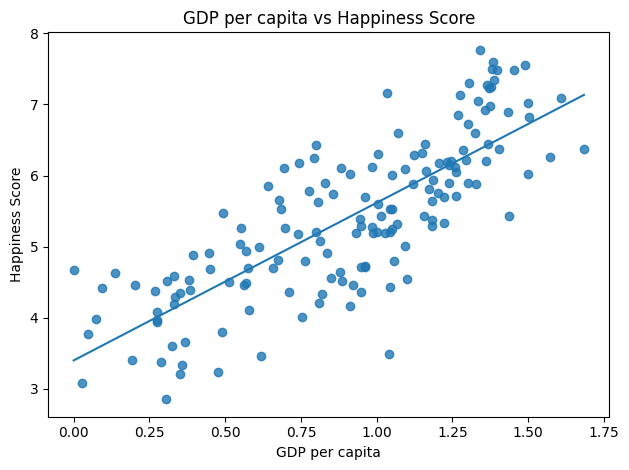

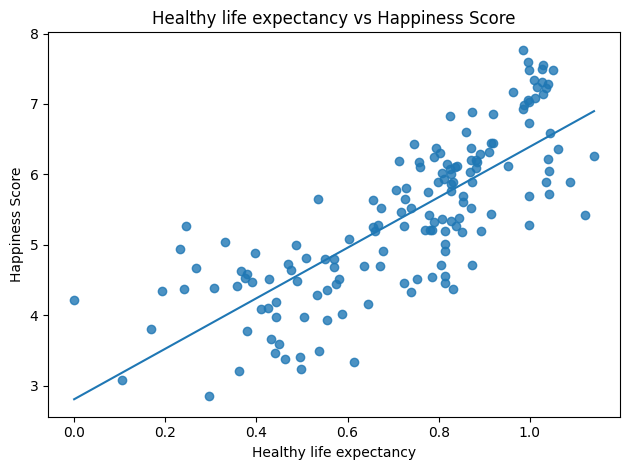

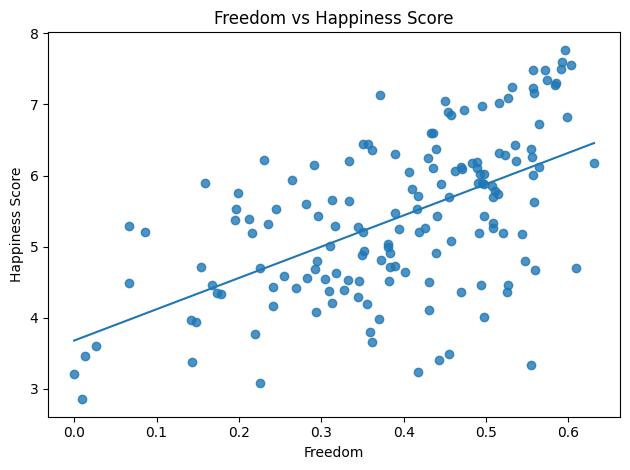

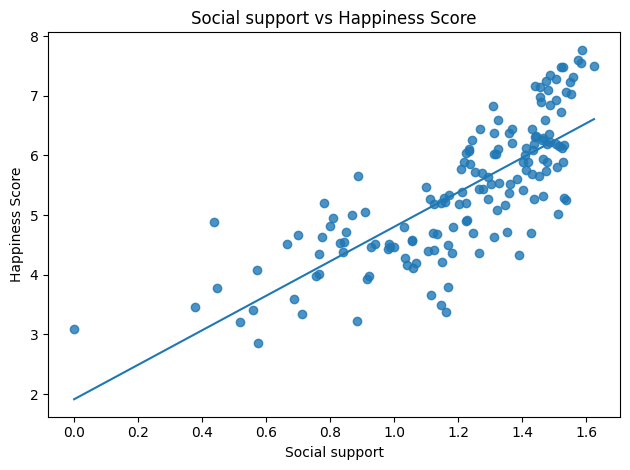

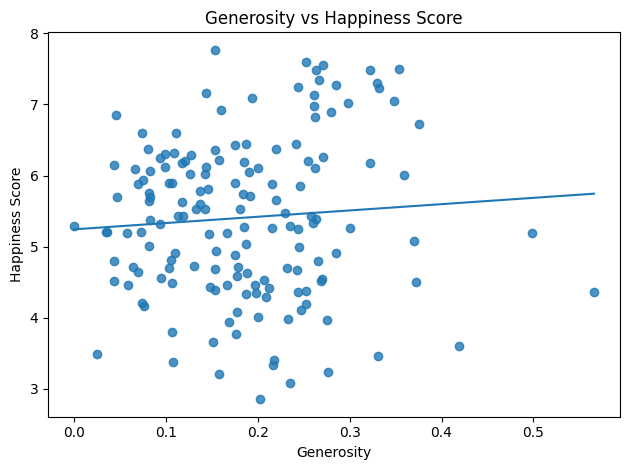

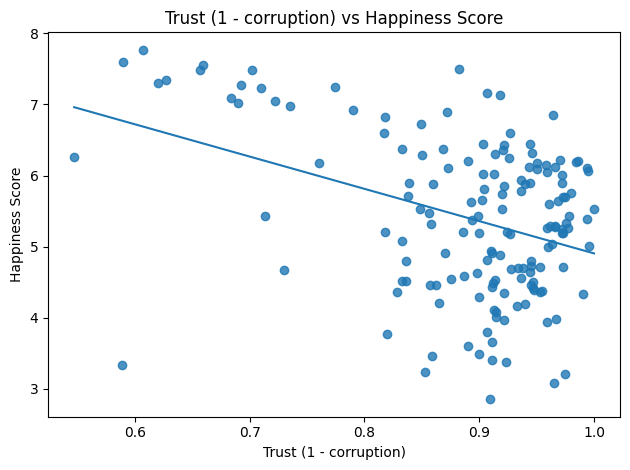

In [80]:
#scatter and trendline for each factor for happiness
def scatter_with_trend(x, y, x_label, y_label="Happiness Score"):
    plt.figure()
    plt.scatter(x, y, alpha=0.8)
    # simple linear fit
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    plt.plot(xs, m*xs + b)
    plt.title(f"{x_label} vs {y_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()

for col in ["gdp_per_capita","healthy_life_expectancy","freedom_to_make_life_choices",
            "social_support","generosity","trust"]:
    if col in df_use.columns:
        scatter_with_trend(
            df_use[col].values,
            df_use["score"].values,
            name_map.get(col, col.replace("_"," ").title())
        )

In [81]:
import sys; print(sys.executable)  # sanity check you're in the right Python
%pip install --upgrade pip
%pip install --no-cache-dir --upgrade numpy scipy scikit-learn

c:\Users\anish\AppData\Local\Programs\Python\Python310\python.exe
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


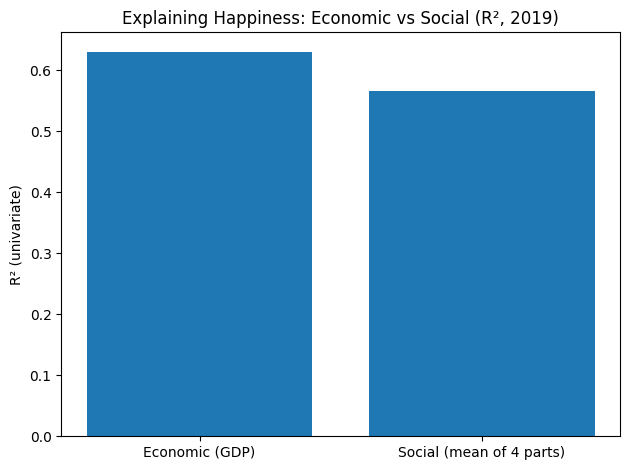

{'Economic (GDP)': 0.6302500079104005,
 'Social (mean of 4 parts)': 0.5659811967840684}

In [82]:
# econocmic vs social: which is "more important"?
%pip install scikit-learn

from sklearn.linear_model import LinearRegression

# Economic = GDP
econ = df_use["gdp_per_capita"] if "gdp_per_capita" in df_use.columns else None

# Social = average of social factors present (higher = “better”)
social_parts = [c for c in ["social_support","freedom_to_make_life_choices","generosity","trust"] if c in df_use.columns]
social = df_use[social_parts].mean(axis=1) if social_parts else None

def r2_univariate(x, y):
    x = x.values.reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    return model.score(x, y)  # R^2

labels, r2s = [], []
if econ is not None:
    labels.append("Economic (GDP)")
    r2s.append(r2_univariate(econ, df_use["score"]))
if social is not None:
    labels.append(f"Social (mean of {len(social_parts)} parts)")
    r2s.append(r2_univariate(social, df_use["score"]))

plt.figure()
plt.bar(labels, r2s)
plt.title("Explaining Happiness: Economic vs Social (R², 2019)")
plt.ylabel("R² (univariate)")
plt.tight_layout()
plt.show()

dict(zip(labels, r2s))

In [83]:
import sys; print(sys.executable)   # sanity check the kernel Python
%pip install --upgrade pip
%pip install --no-cache-dir scikit-learn numpy scipy
from sklearn.linear_model import LinearRegression
print("sklearn OK")


c:\Users\anish\AppData\Local\Programs\Python\Python310\python.exe
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
sklearn OK
